# long range interactions

![Alt text](image.png)

example figure from https://doi.org/10.1016/j.cell.2023.07.008

#### Download test data
```shell
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7113nnn/GSM7113848/suppl/GSM7113848_larval_CNS1.cool.gz
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6614nnn/GSM6614565/suppl/GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool
wget https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM6614565&format=file&file=GSM6614565%5FDmel%5Fw1118%5Flarva%5FCNS%5FHiC%5F2%2Emcool
```

In [1]:
import sys
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src')

In [3]:
import trackc as tc
import cooler

In [18]:
!cooler ls GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool

GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/1000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/2000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/4000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/8000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/16000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/32000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/64000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/128000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/256000
GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/512000


no max min range
maxrange: 117.0 minrange: 1.0


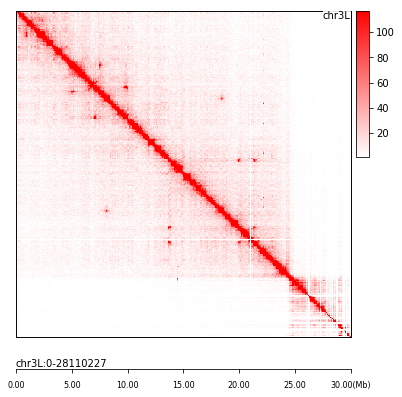

In [103]:
ten = tc.tenon(width=6, height=6)
ten.add(pos='bottom', height=1, hspace=0)

clr = cooler.Cooler("GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/64000")
mat = tc.tl.extractCisContact(clr=clr, region='chr3L')
tc.pl.mapC(ax=ten.axs(0), mat=mat, label='chr3L', map_type='square', 
           symmetric=True)

region = f'chr3L:0-{clr.chromsizes["chr3L"]}'
tc.pl.scale_track(ax=ten.axs(0), region=region, scale_adjust='Mb', tick_pos='bottom', ratio2ax=0)


In [105]:
clr = cooler.Cooler("GSM6614565_Dmel_w1118_larva_CNS_HiC_2.mcool::/resolutions/2000")

no max min range
maxrange: 52.0 minrange: 1.0
no max min range
maxrange: 4.0 minrange: 1.0
no max min range
maxrange: 59.0 minrange: 1.0


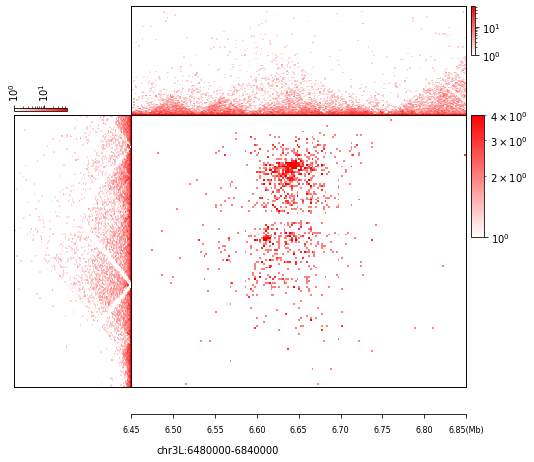

In [113]:
ten = tc.tenon(width=6, height=1)
ten.add(pos='bottom', height=2, hspace=0)
ten.add(pos='bottom', height=5, hspace=0)
axin_l = ten.axs(1).inset_axes([-0.35, 0, 0.35, 1])


region1 = 'chr3L:6480000-6840000'
region2 = 'chr3L:9380000-9100000'

mat_c = tc.tl.extractContactRegions(clr=clr, row_regions=region2, col_regions=region1)
mat_u = tc.tl.extractCisContact(clr=clr, region=region1, extend=150)
mat_l = tc.tl.extractCisContact(clr=clr, region=region2, extend=150)

tc.pl.mapC(ax=ten.axs(0), mat=mat_u, map_type='rectangle', height=150, logdata=True)
tc.pl.mapC(ax=ten.axs(1), mat=mat_c.cmat, map_type='square', symmetric=True, logdata=True)
tc.pl.mapC(ax=axin_l, mat2=mat_l, map_type='rectangle', height=150, trans_ax=True, logdata=True, cmap=tc.pa.fruitpunch)
tc.pl.scale_track(ax=ten.axs(1), region=region1, scale_adjust='Mb', tick_pos='bottom', ratio2ax=0.15)
